In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [4]:
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


In [5]:
print(type(x_train))

<class 'numpy.ndarray'>


In [13]:
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

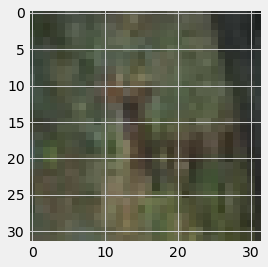

In [14]:
img = plt.imshow(x_train[index])

In [15]:
print("the image label is: " , y_train[index])

the image label is:  [4]


In [16]:
classification = ['airplane','autombile','bird','cat','deer','dog','frog','horse','ship','truck']
print("the image classification is: ",classification[y_train[index][0]])

the image classification is:  deer


In [17]:
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [18]:
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [19]:
x_train = x_train/255
x_test = x_test/255

In [20]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

In [22]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation = 'relu',input_shape=(32,32,3)))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32,(5,5), activation = 'relu'))

model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(1000,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(500,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(250,activation='relu'))

model.add(Dense(10,activation='softmax'))

In [23]:
model.compile(loss = "categorical_crossentropy",optimizer='adam',metrics= ['accuracy'])

In [25]:
hist = model.fit(x_train,y_train_one_hot,batch_size=256,epochs = 10,validation_split = 0.2)

Epoch 1/10
157/157 [==============================] - 52s 333ms/step - loss: 1.7925 - accuracy: 0.3292 - val_loss: 1.4436 - val_accuracy: 0.4675
Epoch 2/10
157/157 [==============================] - 52s 333ms/step - loss: 1.4199 - accuracy: 0.4794 - val_loss: 1.2790 - val_accuracy: 0.5396
Epoch 3/10
157/157 [==============================] - 52s 331ms/step - loss: 1.2658 - accuracy: 0.5443 - val_loss: 1.2329 - val_accuracy: 0.5530
Epoch 4/10
157/157 [==============================] - 52s 331ms/step - loss: 1.1568 - accuracy: 0.5878 - val_loss: 1.1040 - val_accuracy: 0.6139
Epoch 5/10
157/157 [==============================] - 52s 331ms/step - loss: 1.0692 - accuracy: 0.6200 - val_loss: 1.0451 - val_accuracy: 0.6277
Epoch 6/10
157/157 [==============================] - 52s 332ms/step - loss: 0.9937 - accuracy: 0.6455 - val_loss: 1.0592 - val_accuracy: 0.6245
Epoch 7/10
157/157 [==============================] - 52s 331ms/step - loss: 0.9323 - accuracy: 0.6679 - val_loss: 0.9721 - val_ac

In [26]:
model.evaluate(x_test,y_test_one_hot)

313/313 [==============================] - 5s 15ms/step - loss: 0.9745 - accuracy: 0.6701


[0.9744669795036316, 0.6700999736785889]

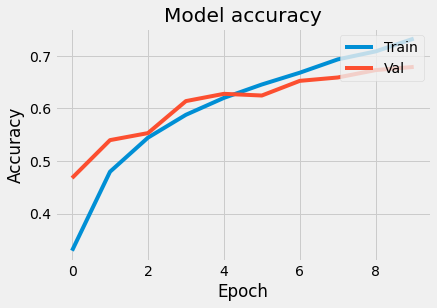

In [27]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title("Model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc= "upper right")
plt.show()

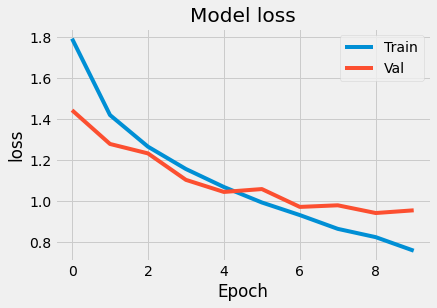

In [28]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title("Model loss")
plt.ylabel("loss")
plt.xlabel("Epoch")
plt.legend(['Train','Val'],loc= "upper right")
plt.show()

In [29]:
from google.colab import files
uploaded = files.upload()

Saving download.jpg to download.jpg


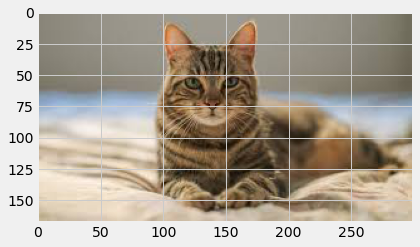

In [30]:
new_image  = plt.imread("download.jpg")
img  = plt.imshow(new_image)

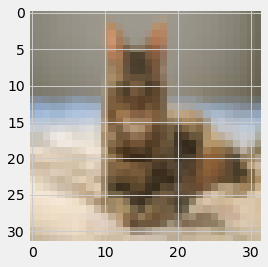

In [31]:
from skimage.transform import resize

resized_image = resize(new_image,(32,32,3))

img = plt.imshow(resized_image)

In [32]:
predictions = model.predict(np.array([resized_image]))

predictions

array([[1.8835120e-03, 4.0040494e-04, 1.9544335e-01, 4.9751309e-01,
        2.1113323e-02, 9.1414519e-02, 1.7821506e-01, 7.5007654e-03,
        3.9469060e-03, 2.5690207e-03]], dtype=float32)

In [33]:
np.argmax(predictions)

3

In [37]:
list_index = [0,1,2,3,4,5,6,7,8,9]

x = predictions

for i in range(10):
  for j in range(10):
    if  x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

print(list_index)

[3, 2, 6, 5, 4, 7, 8, 9, 0, 1]


In [38]:
for i in range(5):
  print(classification[list_index[i]])

cat
bird
frog
dog
deer
